In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from tqdm import tqdm
import re

## Univariate

In [22]:
df = pd.read_csv('bit+cap+inf.csv')
df = df[['Date','next_day_closing_price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    3093 non-null   object 
 1   next_day_closing_price  3093 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.5+ KB


In [23]:
df['next_day_closing_price'] = np.log(df['next_day_closing_price'])

In [24]:
size = int(df.shape[0]-600)
# Divide into train and test
train_pr, test_pr = df[:-600], df[-600:]

In [25]:
from prophet import Prophet
#rename columns
prophet_df = train_pr.rename(columns={'Date':'ds',
                                'next_day_closing_price':'y'})
#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [26]:
prophet_df.head()

,ds,y
0,2013-04-01,4.770685
1,2013-04-02,4.905275
2,2013-04-03,4.883559
3,2013-04-04,4.957938
4,2013-04-05,4.960044


In [27]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

00:39:52 - cmdstanpy - INFO - Chain [1] start processing
00:39:54 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
#forecast for the next 30 days
futr = model.make_future_dataframe(periods=600)

#predict
frcst = model.predict(futr)

In [29]:
frcst['yhat'] = np.exp(frcst['yhat'])

In [30]:
frcst['yhat']

0         131.320716
1         130.320680
2         128.870722
3         128.120980
4         127.757704
            ...     
3088    24617.532964
3089    24260.124242
3090    24003.663714
3091    23793.582347
3092    23533.917889
Name: yhat, Length: 3093, dtype: float64

In [34]:
df['next_day_closing_price'] = np.exp(df['next_day_closing_price'])

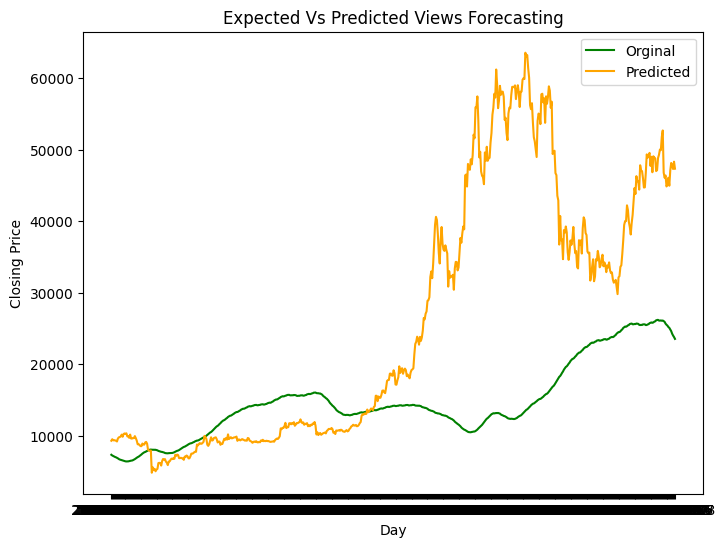

In [36]:
plot.figure(figsize=(8, 6))
test_day = [t for t in range(600)]
labels={'Orginal','Predicted'}
plot.plot(df['Date'][-600:], frcst['yhat'][-600:], color= 'green')
plot.plot(df['Date'][-600:], df['next_day_closing_price'][-600:], color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

## Multivariate

In [12]:
final_df = pd.read_csv('bit+cap+inf.csv')

In [13]:
final_df.shape

(3093, 27)

In [14]:
final_df.columns

Index(['Inflation', 'Date', 'opening_price', 'highest_price', 'lowest_price',
       'closing_price', 'transactions_in_blockchain', 'avg_block_size',
       'sent_by_adress', 'avg_mining_difficulty', 'avg_hashrate',
       'mining_profitability', 'sent_coins_in_usd', 'avg_transaction_fees',
       'median_transaction_fees', 'avg_block_time', 'avg_transaction_value',
       'median_transaction_value', 'tweets', 'google_trends',
       'active_addresses', 'top100_to_total_percentage', 'avg_fee_to_reward',
       'number_of_coins_in_circulation', 'miner_revenue',
       'next_day_closing_price', 'mar_cap'],
      dtype='object')

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Inflation                       3093 non-null   float64
 1   Date                            3093 non-null   object 
 2   opening_price                   3093 non-null   float64
 3   highest_price                   3093 non-null   float64
 4   lowest_price                    3093 non-null   float64
 5   closing_price                   3093 non-null   float64
 6   transactions_in_blockchain      3093 non-null   int64  
 7   avg_block_size                  3093 non-null   int64  
 8   sent_by_adress                  3093 non-null   int64  
 9   avg_mining_difficulty           3093 non-null   int64  
 10  avg_hashrate                    3093 non-null   float64
 11  mining_profitability            3093 non-null   float64
 12  sent_coins_in_usd               30

In [16]:
final_df.isnull().sum()

Inflation                         0
Date                              0
opening_price                     0
highest_price                     0
lowest_price                      0
closing_price                     0
transactions_in_blockchain        0
avg_block_size                    0
sent_by_adress                    0
avg_mining_difficulty             0
avg_hashrate                      0
mining_profitability              0
sent_coins_in_usd                 0
avg_transaction_fees              0
median_transaction_fees           0
avg_block_time                    0
avg_transaction_value             0
median_transaction_value          0
tweets                            0
google_trends                     0
active_addresses                  0
top100_to_total_percentage        0
avg_fee_to_reward                 0
number_of_coins_in_circulation    0
miner_revenue                     0
next_day_closing_price            0
mar_cap                           0
dtype: int64

In [17]:
final_df.dropna()

,Inflation,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,...,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price,mar_cap
0,101.8,2013-04-01,93.0,106.0,92.2,104.0,52572,139256,48809,6695826,...,64.987,8193.0,15.248000,75756.0,19.962,0.867,10975275.00,4.818914e+05,118.0,1.023444e+09
1,101.8,2013-04-02,104.0,118.4,99.0,118.0,63095,175443,62276,6695826,...,94.955,8193.0,17.192000,91875.0,20.024,1.338,10988125.00,5.312995e+05,135.0,1.525042e+09
2,101.8,2013-04-03,118.0,147.0,110.0,135.0,63766,184209,69174,6695826,...,102.533,8193.0,26.608000,107142.0,19.987,1.596,10986575.00,5.384239e+05,132.1,1.289165e+09
3,101.8,2013-04-04,135.0,142.1,116.4,132.1,66738,221568,71753,6695826,...,123.314,8193.0,24.681000,108890.0,19.990,1.948,10995725.00,5.251576e+05,142.3,1.581185e+09
4,101.8,2013-04-05,132.1,144.9,130.2,142.3,61215,190067,69310,7005058,...,125.183,8193.0,20.514000,100034.0,19.833,1.432,10999925.00,6.064548e+05,142.6,1.567463e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,121.6,2021-09-14,44950.2,47247.6,44718.7,47077.5,267959,599399,472333,18415156832118,...,717.117,91267.0,108.864900,793939.0,15.218,1.394,18816150.00,4.946986e+07,48130.6,8.835688e+11
3089,121.6,2021-09-15,47070.8,48436.5,46743.9,48130.6,268815,736726,459889,18415156832118,...,773.643,109407.0,111.309556,823392.0,15.186,1.887,18817025.00,4.302687e+07,47748.0,9.035857e+11
3090,121.6,2021-09-16,48132.3,48480.6,47040.3,47748.0,271087,817607,436025,18415156832118,...,719.701,90855.0,113.459125,879832.0,15.185,1.938,18817900.00,4.144786e+07,47282.8,8.938525e+11
3091,121.6,2021-09-17,47748.2,48155.9,46788.8,47282.8,270893,720056,384965,18415156832118,...,714.990,101046.0,116.526571,823793.0,15.177,1.605,18818781.25,4.500074e+07,48306.7,8.896617e+11


In [18]:
train = final_df[:-600].copy()
test = final_df[-600:].copy()

In [19]:
train = train.rename(columns={'Date':'ds',
                                'next_day_closing_price':'y'})

In [20]:
test.drop('next_day_closing_price' , inplace=True , axis=1)

In [21]:
test = test.rename(columns={'Date':'ds'})

In [22]:
test

,Inflation,ds,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,mar_cap
2493,109.2,2020-01-28,8866.6,9389.5,8866.6,9377.3,339910,854678,496656,15203806713070,...,27917.0,300.830,20422.0,42.206000,702991.0,15.116,1.279,18185650.00,1.624255e+07,1.645619e+11
2494,109.2,2020-01-29,9377.3,9428.7,9250.9,9298.9,340402,706867,481467,15466098935555,...,24490.0,257.694,22062.0,44.183000,669492.0,15.124,1.011,18188862.50,1.888756e+07,1.698931e+11
2495,109.2,2020-01-30,9299.1,9569.0,9209.2,9507.3,332402,704883,473295,15466098935555,...,41076.0,244.539,18452.0,43.583000,620353.0,15.127,0.998,18190887.50,1.892228e+07,1.736138e+11
2496,109.2,2020-01-31,9508.3,9525.0,9222.3,9349.1,334290,770486,473560,15466098935555,...,33691.0,283.366,17685.0,40.656000,644064.0,15.134,1.237,18191175.00,1.704064e+07,1.723432e+11
2497,108.7,2020-02-01,9349.3,9458.8,9301.5,9381.6,303573,650769,427299,15466098935555,...,25261.0,217.018,15818.0,36.660000,585209.0,15.135,0.918,18194612.50,1.785816e+07,1.707746e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,121.6,2021-09-14,44950.2,47247.6,44718.7,47077.5,267959,599399,472333,18415156832118,...,1932378.0,717.117,91267.0,108.864900,793939.0,15.218,1.394,18816150.00,4.946986e+07,8.835688e+11
3089,121.6,2021-09-15,47070.8,48436.5,46743.9,48130.6,268815,736726,459889,18415156832118,...,702497.0,773.643,109407.0,111.309556,823392.0,15.186,1.887,18817025.00,4.302687e+07,9.035857e+11
3090,121.6,2021-09-16,48132.3,48480.6,47040.3,47748.0,271087,817607,436025,18415156832118,...,766989.0,719.701,90855.0,113.459125,879832.0,15.185,1.938,18817900.00,4.144786e+07,8.938525e+11
3091,121.6,2021-09-17,47748.2,48155.9,46788.8,47282.8,270893,720056,384965,18415156832118,...,612387.0,714.990,101046.0,116.526571,823793.0,15.177,1.605,18818781.25,4.500074e+07,8.896617e+11


In [23]:
train_lg = np.log(train.loc[:, train.columns != 'ds'])

In [24]:
train_lg['ds'] = train['ds'] 

In [25]:
test_lg = np.log(test.loc[:, test.columns != 'ds'])

In [26]:
test_lg['ds'] = test['ds'] 

In [28]:
from prophet import Prophet


#x_test = scaler.fit_transform(test)

#initialize
model = Prophet()
model.add_regressor('opening_price')
model.add_regressor('highest_price')
model.add_regressor('lowest_price')
model.add_regressor('closing_price')
model.add_regressor('transactions_in_blockchain')
model.add_regressor('avg_block_size')
model.add_regressor('sent_by_adress')
model.add_regressor('avg_mining_difficulty')
model.add_regressor('avg_hashrate')
model.add_regressor('mining_profitability')
model.add_regressor('sent_coins_in_usd')
model.add_regressor('avg_transaction_fees')
model.add_regressor('median_transaction_fees')
model.add_regressor('avg_block_time')
model.add_regressor('avg_transaction_value')
model.add_regressor('median_transaction_value')
model.add_regressor('tweets')
model.add_regressor('google_trends')
model.add_regressor('active_addresses')
model.add_regressor('top100_to_total_percentage')
model.add_regressor('avg_fee_to_reward')
model.add_regressor('number_of_coins_in_circulation')
model.add_regressor('miner_revenue')
model.add_regressor('mar_cap')
model.add_regressor('Inflation')
model.fit(train_lg)

23:28:44 - cmdstanpy - INFO - Chain [1] start processing
23:28:47 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
#predict
frcst = model.predict(test_lg)

In [30]:
frcst = frcst[['ds' , 'yhat']]

In [31]:
frcst

,ds,yhat
0,2020-01-28,9.143294
1,2020-01-29,9.149057
2,2020-01-30,9.176897
3,2020-01-31,9.155657
4,2020-02-01,9.155398
...,...,...
595,2021-09-14,10.897993
596,2021-09-15,10.891502
597,2021-09-16,10.882382
598,2021-09-17,10.872613


In [32]:
frcst['yhat'] = np.exp(frcst['yhat'])

In [33]:
frcst

,ds,yhat
0,2020-01-28,9351.514917
1,2020-01-29,9405.563647
2,2020-01-30,9671.092979
3,2020-01-31,9467.852204
4,2020-02-01,9465.400275
...,...,...
595,2021-09-14,54067.745038
596,2021-09-15,53717.915626
597,2021-09-16,53230.258732
598,2021-09-17,52712.747669


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import math
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(final_df[-600:]['next_day_closing_price'], frcst['yhat']))))

Root Mean squared Error - RMSE : 3194.906301747164


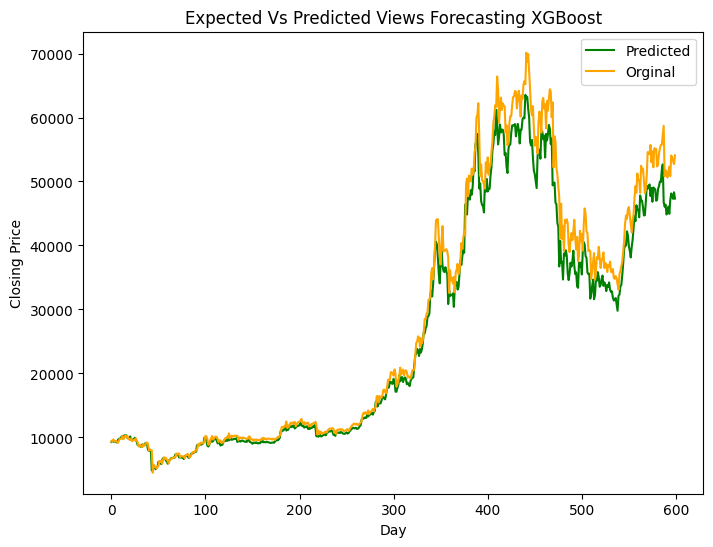

In [36]:
plot.figure(figsize=(8, 6))
test_day = [t for t in range(600)]
labels={'Orginal','Predicted'}
plot.plot(test_day, final_df[-600:]['next_day_closing_price'], color= 'green')
plot.plot(test_day, frcst['yhat'], color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting XGBoost')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()